In [122]:
import json
import pandas as pd
from uszipcode import SearchEngine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [123]:
search = SearchEngine(simple_zipcode=False)
alpharetta = search.by_zipcode('30005')

In [149]:
df_2018 = pd.read_csv('Data/2018-12.csv')
# drop null zip code
df_2018.dropna(subset=["ZIP_CD"], inplace=True)
df_2018['ZIP_CD'] = df_2018['ZIP_CD'].astype(str).replace('\.0', '', regex=True)
df_2018.head()

/Users/paras.mehta/.virtualenvs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (5,7,10,19,28,49,50,51,52,53,58,59,76,77,78,79,82,83,84,85,86,87,88,89,90,91,92,93,96,101,103,104,106,107,110,112,113,115,117,118,133,134,135,137,139,143,148,151,159,160,161,168,169,170,176,177,178,182,183,184,191,192,194,195,196,203,204,205,212,213,214,216,217,218,225,226,227,228,229,230,232,233,234,242,243,245,246,247,248,249,250,252,253,254,255,256,257,258,259,260,263,264,265,266,267,268,270,271,272,274,275,276,279,280,281,283,284,285,286,287,288,290,291,292,295,296,297,298,299,300,301,302,303,305,306,307,310,311,312,313,314,315,316,455,456,457,458,459,460,461,462,463,464,465,466,467) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PRVDR_CTGRY_SBTYP_CD,PRVDR_CTGRY_CD,CHOW_CNT,CHOW_DT,CITY_NAME,ACPTBL_POC_SW,CMPLNC_STUS_CD,SSA_CNTY_CD,CROSS_REF_PROVIDER_NUMBER,CRTFCTN_DT,...,OTHR_SRGRY_SW,PAIN_SRGRY_SW,PLSTC_SRGRY_SW,FT_SRGRY_SW,SB_SW,SB_SIZE_CD,TCHNLGST_2_YR_RDLGC_CNT,TCHNLGST_ASCT_DGR_CNT,TCHNLGST_BS_BA_DGR_CNT,DLYS_STN_CNT
0,1.0,1,1,NaN,DOTHAN,False,B,340,010163,20171005.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,1.0,1,0,NaN,BRIDGEPORT,False,A,350,NaN,20010316.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,1.0,1,0,NaN,BOAZ,True,A,470,NaN,20021003.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,1.0,1,1,20100701.0,FLORENCE,False,B,380,NaN,20100715.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,1.0,1,0,NaN,OPP,False,B,190,NaN,20150716.0,...,NaN,NaN,NaN,NaN,True,2.0,NaN,NaN,NaN,NaN


In [150]:
# find name of zip code column
print([col for col in df_2018.columns if "zip" in col.lower()])

['ZIP_CD']


In [151]:
num_unique_cds = len(df_2018['ZIP_CD'].drop_duplicates())
# providers per zip code
cnt_by_cd = df_2018.groupby("ZIP_CD").size()

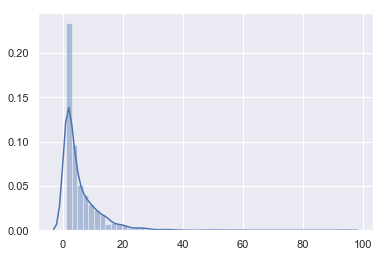

In [152]:
sns.set(color_codes=True)
sns.distplot(cnt_by_cd)

In [153]:
slalom_zip_val = "30326"
slalom_zip_cd = search.by_zipcode(slalom_zip_val)
print("\n".join(slalom_zip_cd.to_dict().keys()))

zipcode_type
major_city
post_office_city
common_city_list
county
state
lat
lng
timezone
radius_in_miles
area_code_list
population
population_density
land_area_in_sqmi
water_area_in_sqmi
housing_units
occupied_housing_units
median_home_value
median_household_income
bounds_west
bounds_east
bounds_north
bounds_south
zipcode
polygon
population_by_year
population_by_age
population_by_gender
population_by_race
head_of_household_by_age
families_vs_singles
households_with_kids
children_by_age
housing_type
year_housing_was_built
housing_occupancy
vancancy_reason
owner_occupied_home_values
rental_properties_by_number_of_rooms
monthly_rent_including_utilities_studio_apt
monthly_rent_including_utilities_1_b
monthly_rent_including_utilities_2_b
monthly_rent_including_utilities_3plus_b
employment_status
average_household_income_over_time
household_income
annual_individual_earnings
sources_of_household_income____percent_of_households_receiving_income
sources_of_household_income____average_income_per_

In [187]:
# occupancy_ratio: occupied_housing_units / housing_units
cols_to_explore = ["population_density", 
                   "occupied_housing_units",
                   "housing_units", 
                   "median_home_value", 
                   "median_household_income"]

cols_to_explode = ["population_by_gender",
                  "population_by_race", 
                  "families_vs_singles", 
                  "households_with_kids", 
                  "employment_status", 
                  "household_income", 
                  "source_of_earnings", 
                  "means_of_transportation_to_work_for_workers_16_and_over", 
                  "travel_time_to_work_in_minutes", 
                  "educational_attainment_for_population_25_and_over"]

In [197]:
def explode_cols(zip_cd_dict, cols_to_explode):
    tmp_zip_cd_dict = zip_cd_dict
    for col in cols_to_explode:
        if tmp_zip_cd_dict[col] is not None:
            data_vals = tmp_zip_cd_dict[col][0]['values']
            total = sum([val["y"] for val in data_vals])
            ratio_cols = {val["x"].lower() + "_ratio": round(val["y"]/total, 4) for val in data_vals}
            tmp_zip_cd_dict = {**tmp_zip_cd_dict, **ratio_cols}
    return tmp_zip_cd_dict
        
        
def load_zipcode_info(codes):
    zipcode_info = pd.DataFrame([explode_cols(search.by_zipcode(code).to_dict(), cols_to_explode)
                                              for code in codes])
    return zipcode_info
    
provider_cds = list(set(df_2018["ZIP_CD"].values))
provider_cds_info = load_zipcode_info(provider_cds)
provider_cds_info.head()

,"$100,000-$149,999_ratio","$150,000-$199,999_ratio","$200,000+_ratio","$25,000-$44,999_ratio","$45,000-$59,999_ratio","$60,000-$99,999_ratio",10-19_ratio,20-29_ratio,30-39_ratio,40-44_ratio,...,two or more races_ratio,vancancy_reason,water_area_in_sqmi,white_ratio,worked at home_ratio,worked full-time with earnings_ratio,worked part-time with earnings_ratio,year_housing_was_built,zipcode,zipcode_type
0,0.1245,0.0294,0.0165,0.1935,0.1296,0.2713,0.2598,0.2741,0.2217,0.0446,...,0.0715,"[{'key': 'Data', 'values': [{'x': 'For Rent', ...",0.00,0.5154,0.0415,0.3855,0.2362,"[{'key': 'Data', 'values': [{'x': '1939 Or Ear...",91945,Standard
1,0.0824,0.0412,0.0029,0.2885,0.2139,0.1001,0.2704,0.2232,0.2075,0.0232,...,0.0424,"[{'key': 'Data', 'values': [{'x': 'For Rent', ...",0.09,0.7954,0.0532,0.4473,0.1592,"[{'key': 'Data', 'values': [{'x': '1939 Or Ear...",72722,Standard
2,NaN,NaN,NaN,NaN,NaN,NaN,0.3415,0.2683,0.0000,0.0000,...,0.0033,None,0.00,0.6007,0.2115,0.0000,0.5945,None,72467,PO Box
3,0.1794,0.0905,0.0636,0.1404,0.1164,0.2597,0.2499,0.1277,0.1487,0.0549,...,0.0759,"[{'key': 'Data', 'values': [{'x': 'For Rent', ...",0.73,0.3309,0.0309,0.3871,0.2474,"[{'key': 'Data', 'values': [{'x': '1939 Or Ear...",94591,Standard
4,0.0533,0.0056,0.0100,0.2451,0.1807,0.2118,0.2644,0.1821,0.2514,0.0393,...,0.0194,"[{'key': 'Data', 'values': [{'x': 'For Rent', ...",0.32,0.9530,0.0132,0.3152,0.1906,"[{'key': 'Data', 'values': [{'x': '1939 Or Ear...",35622,Standard


In [198]:
enriched_data = pd.merge(df_2018, provider_cds_info, left_on="ZIP_CD", right_on="zipcode", how="inner")
enriched_data.head()

,PRVDR_CTGRY_SBTYP_CD,PRVDR_CTGRY_CD,CHOW_CNT,CHOW_DT,CITY_NAME,ACPTBL_POC_SW,CMPLNC_STUS_CD,SSA_CNTY_CD,CROSS_REF_PROVIDER_NUMBER,CRTFCTN_DT,...,two or more races_ratio,vancancy_reason,water_area_in_sqmi,white_ratio,worked at home_ratio,worked full-time with earnings_ratio,worked part-time with earnings_ratio,year_housing_was_built,zipcode,zipcode_type
0,1.0,1,1,NaN,DOTHAN,False,B,340,010163,20171005.0,...,0.0182,"[{'key': 'Data', 'values': [{'x': 'For Rent', ...",0.64,0.6803,0.0142,0.3973,0.2181,"[{'key': 'Data', 'values': [{'x': '1939 Or Ear...",36301,Standard
1,1.0,1,0,NaN,DOTHAN,False,A,340,014013,19980701.0,...,0.0182,"[{'key': 'Data', 'values': [{'x': 'For Rent', ...",0.64,0.6803,0.0142,0.3973,0.2181,"[{'key': 'Data', 'values': [{'x': '1939 Or Ear...",36301,Standard
2,1.0,16,0,NaN,DOTHAN,False,B,340,NaN,20170413.0,...,0.0182,"[{'key': 'Data', 'values': [{'x': 'For Rent', ...",0.64,0.6803,0.0142,0.3973,0.2181,"[{'key': 'Data', 'values': [{'x': '1939 Or Ear...",36301,Standard
3,1.0,9,2,NaN,DOTHAN,False,B,340,NaN,20170330.0,...,0.0182,"[{'key': 'Data', 'values': [{'x': 'For Rent', ...",0.64,0.6803,0.0142,0.3973,0.2181,"[{'key': 'Data', 'values': [{'x': '1939 Or Ear...",36301,Standard
4,1.0,9,1,NaN,DOTHAN,True,A,340,NaN,20161201.0,...,0.0182,"[{'key': 'Data', 'values': [{'x': 'For Rent', ...",0.64,0.6803,0.0142,0.3973,0.2181,"[{'key': 'Data', 'values': [{'x': '1939 Or Ear...",36301,Standard


In [199]:
len(enriched_data)

11661